# 1. Import the Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 2. Import the dataset

In [3]:
dataset=pd.read_csv("Titanic-Dataset.csv")

In [4]:
dataset.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
dataset.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


# 3. Checking for Null Values

In [7]:
dataset.isnull().any()

PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age             True
SibSp          False
Parch          False
Ticket         False
Fare           False
Cabin           True
Embarked        True
dtype: bool

In [11]:
dataset.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          685
Embarked         2
dtype: int64

In [12]:
dataset["Age"].fillna(dataset["Age"].mean(),inplace=True)

In [13]:
dataset["Cabin"].fillna(dataset["Cabin"].mode(),inplace=True)

In [14]:
dataset["Embarked"].fillna(dataset["Embarked"].mode(),inplace=False)

0      S
1      C
2      S
3      S
4      S
      ..
886    S
887    S
888    S
889    C
890    Q
Name: Embarked, Length: 891, dtype: object

In [15]:
dataset.dropna(subset = ['Cabin'], inplace=True)

In [16]:
dataset.dropna(subset = ['Embarked'], inplace=True)

In [17]:
dataset.isnull().any()

PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age            False
SibSp          False
Parch          False
Ticket         False
Fare           False
Cabin          False
Embarked       False
dtype: bool

In [22]:
dataset.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

# 4. Data Visualization

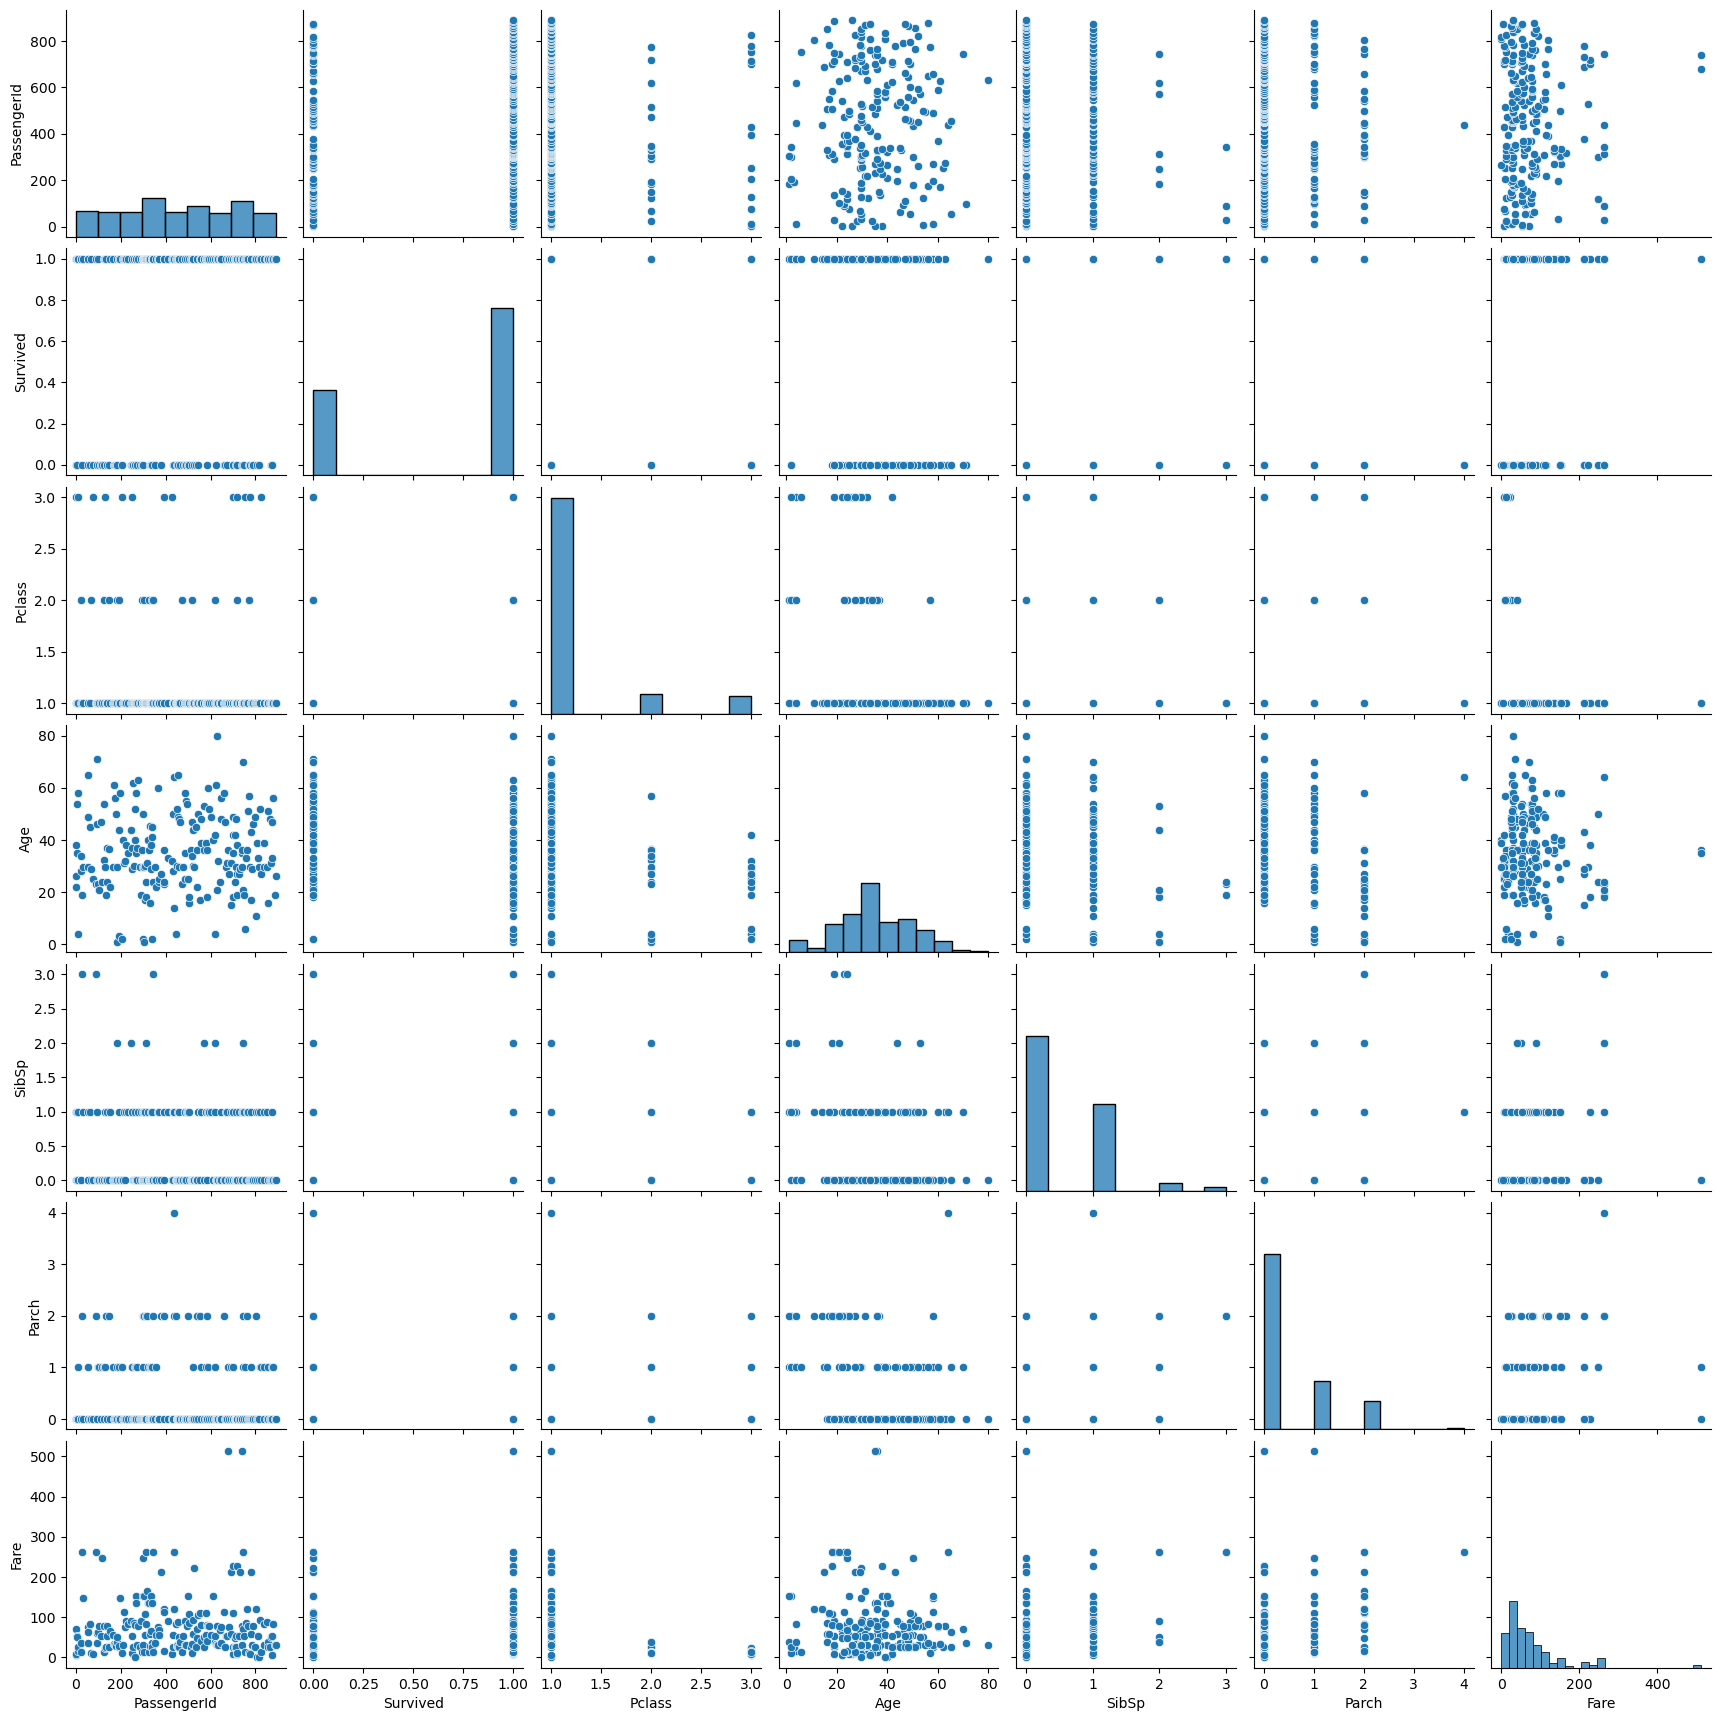

In [18]:
sns.pairplot(dataset)
plt.show()

### Visualizing passenger class distribution

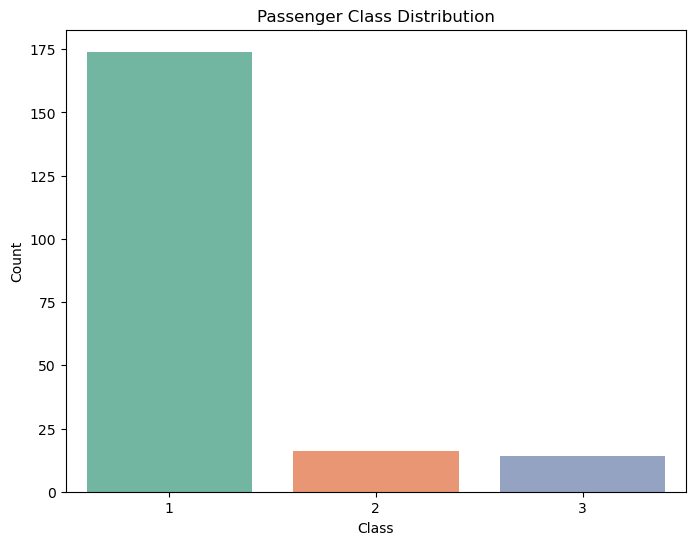

In [19]:
plt.figure(figsize=(8, 6))
sns.countplot(data=dataset, x='Pclass', palette='Set2')
plt.title('Passenger Class Distribution')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

### Visualizing age distribution

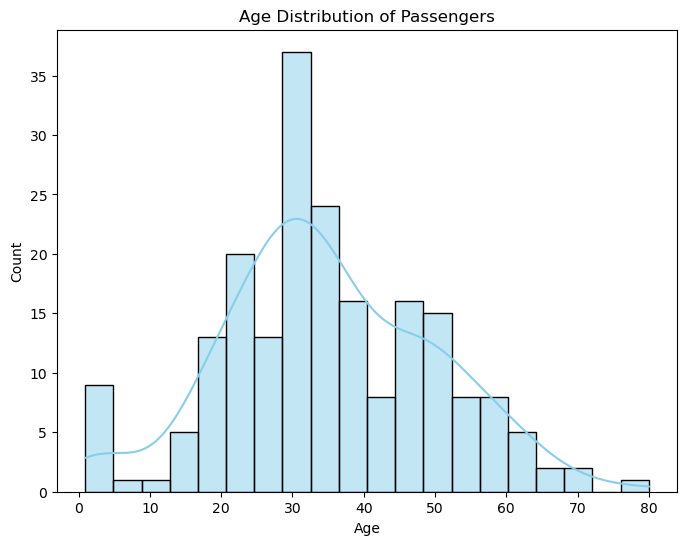

In [20]:
plt.figure(figsize=(8, 6))
sns.histplot(data=dataset, x='Age', bins=20, kde=True, color='skyblue')
plt.title('Age Distribution of Passengers')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

### Visualizing survival by gender

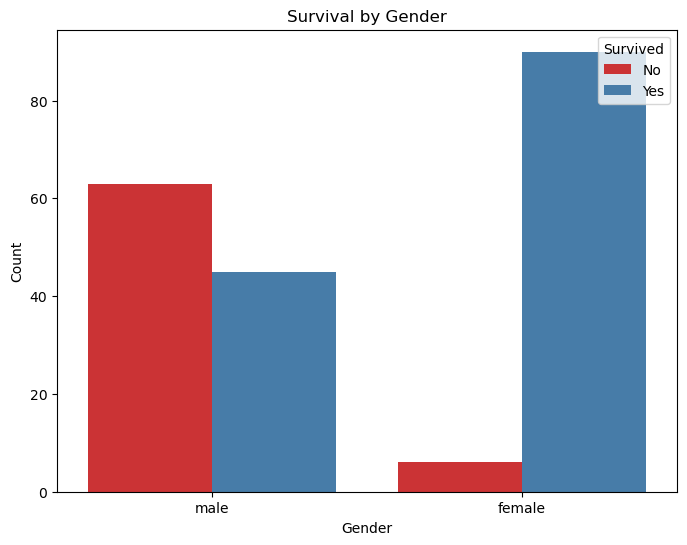

In [21]:
plt.figure(figsize=(8, 6))
sns.countplot(data=dataset, x='Sex', hue='Survived', palette='Set1')
plt.title('Survival by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend(title='Survived', loc='upper right', labels=['No', 'Yes'])
plt.show()

# 5. Outlier Detection and Removal

<Axes: >

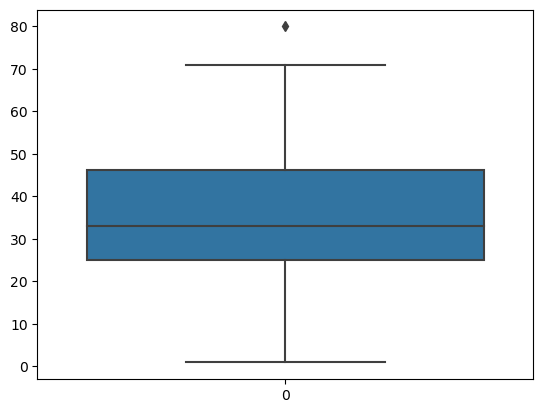

In [23]:
# Outlier detection
sns.boxplot(dataset.Age)

In [24]:
# Outlier Removal by replacement with median
median = dataset.loc[dataset['Age']>35, 'Age'].median()
dataset.loc[dataset.Age > 35, 'Age'] = np.nan
dataset.fillna(median,inplace=True)

# 6. Splitting Dependent and Independent    variables

In [25]:
num1=dataset.iloc[:,3:12]
num2=dataset.iloc[:,12:13]

In [26]:
num1.head()

,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,B96 B98,S
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,47.0,1,0,PC 17599,71.2833,C85,C
2,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,G6,S
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
6,"McCarthy, Mr. Timothy J",male,47.0,0,0,17463,51.8625,E46,S


In [27]:
num2.head()

""
0
1
2
3
6


In [28]:
dataset.shape

(204, 12)

In [29]:
num1.shape

(204, 9)

In [30]:
num2.shape

(204, 0)

# 7. Encoding

### Label Encoding on Sex column

In [31]:
from sklearn.preprocessing import LabelEncoder

In [32]:
labenc=LabelEncoder()

In [33]:
num1["Sex"]=labenc.fit_transform(num1["Sex"])

In [34]:
num1["Sex"]

0      1
1      0
2      0
3      0
6      1
      ..
871    0
872    1
879    0
887    0
889    1
Name: Sex, Length: 204, dtype: int32

In [35]:
num1.head()

,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,B96 B98,S
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,47.0,1,0,PC 17599,71.2833,C85,C
2,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,G6,S
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S
6,"McCarthy, Mr. Timothy J",1,47.0,0,0,17463,51.8625,E46,S


In [36]:
num1.Name.value_counts()

Braund, Mr. Owen Harris                                     1
Kimball, Mr. Edwin Nelson Jr                                1
Flynn, Mr. John Irwin ("Irving")                            1
Silvey, Mrs. William Baird (Alice Munger)                   1
Thayer, Mrs. John Borland (Marian Longstreth Morris)        1
                                                           ..
Wick, Miss. Mary Natalie                                    1
Spedden, Mrs. Frederic Oakley (Margaretta Corning Stone)    1
Young, Miss. Marie Grice                                    1
Ball, Mrs. (Ada E Hall)                                     1
Behr, Mr. Karl Howell                                       1
Name: Name, Length: 204, dtype: int64

In [37]:
num1.shape

(204, 9)

### One Hot Encoding on Ticket column

In [38]:
num2=pd.get_dummies(num1["Ticket"],drop_first=True)

In [39]:
num2

,110413,110465,110564,110813,111240,111320,111361,111369,112050,112053,...,PC 17760,PC 17761,PP 9549,S.O./P.P. 3,SC/AH Basle 541,SC/Paris 2163,SOTON/O.Q. 392078,STON/O2. 3101282,W.E.P. 5734,WE/P 5735
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
871,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
872,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
879,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
887,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


### Concat

In [40]:
num1=pd.concat([num1,num2],axis=1)

In [41]:
num1.head()

,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,110413,...,PC 17760,PC 17761,PP 9549,S.O./P.P. 3,SC/AH Basle 541,SC/Paris 2163,SOTON/O.Q. 392078,STON/O2. 3101282,W.E.P. 5734,WE/P 5735
0,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,B96 B98,S,0,...,0,0,0,0,0,0,0,0,0,0
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,47.0,1,0,PC 17599,71.2833,C85,C,0,...,0,0,0,0,0,0,0,0,0,0
2,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,G6,S,0,...,0,0,0,0,0,0,0,1,0,0
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S,0,...,0,0,0,0,0,0,0,0,0,0
6,"McCarthy, Mr. Timothy J",1,47.0,0,0,17463,51.8625,E46,S,0,...,0,0,0,0,0,0,0,0,0,0


### Drop Ticket column

In [42]:
num1.drop(["Ticket"],axis=1,inplace=True)

In [43]:
num1.shape

(204, 150)

# 8. Splitting Data into Training and Testing set

In [44]:
from sklearn.model_selection import train_test_split
num1_train,num1_test,num2_train,num2_test=train_test_split(num1,num2,test_size=0.3,random_state=0)

In [45]:
num1_train.shape,num1_test.shape,num2_train.shape,num2_test.shape

((142, 150), (62, 150), (142, 142), (62, 142))

In [46]:
num3=[1,3,4,5,7,9]
num4=[2,4,6,7,8,9]
for i in range(5):
    num3_train,num3_test,num4_train,num4_test=train_test_split(num3,num4,test_size=0.3,random_state=100)
    print("With random state: ",num3_train)

With random state:  [7, 5, 9, 1]
With random state:  [7, 5, 9, 1]
With random state:  [7, 5, 9, 1]
With random state:  [7, 5, 9, 1]
With random state:  [7, 5, 9, 1]


In [47]:
num3=[1,3,4,5,7,9]
num4=[2,4,6,7,8,9]
for i in range(5):
    num3_train,num3_test,num4_train,num4_test=train_test_split(num3,num4,test_size=0.3)
    print("Without random state: ",num3_train)

Without random state:  [4, 1, 7, 3]
Without random state:  [9, 7, 4, 1]
Without random state:  [7, 3, 1, 5]
Without random state:  [4, 9, 7, 5]
Without random state:  [7, 3, 1, 5]


# 9. Feature Scaling

In [48]:
from sklearn.preprocessing import StandardScaler
standscal=StandardScaler()

In [54]:
num1_train=standscal.fit_transform(num2_train)
num1_test=standscal.fit_transform(num2_test)

In [55]:
num1_train

array([[-0.14691063, -0.08421519, -0.08421519, ..., -0.08421519,
         0.        , -0.08421519],
       [-0.14691063, -0.08421519, -0.08421519, ..., -0.08421519,
         0.        , -0.08421519],
       [-0.14691063, -0.08421519, -0.08421519, ..., -0.08421519,
         0.        , -0.08421519],
       ...,
       [-0.14691063, -0.08421519, -0.08421519, ..., -0.08421519,
         0.        , -0.08421519],
       [-0.14691063, -0.08421519, -0.08421519, ..., -0.08421519,
         0.        , -0.08421519],
       [-0.14691063, -0.08421519, -0.08421519, ..., -0.08421519,
         0.        , -0.08421519]])

In [56]:
num1_test

array([[ 0.        , -0.12803688,  0.        , ...,  0.        ,
         7.81024968, -0.12803688],
       [ 0.        , -0.12803688,  0.        , ...,  0.        ,
        -0.12803688, -0.12803688],
       [ 0.        , -0.12803688,  0.        , ...,  0.        ,
        -0.12803688, -0.12803688],
       ...,
       [ 0.        , -0.12803688,  0.        , ...,  0.        ,
        -0.12803688, -0.12803688],
       [ 0.        , -0.12803688,  0.        , ...,  0.        ,
        -0.12803688, -0.12803688],
       [ 0.        , -0.12803688,  0.        , ...,  0.        ,
        -0.12803688, -0.12803688]])

In [57]:
num2_train=standscal.fit_transform(num2_train)
num2_test=standscal.fit_transform(num2_test)

In [58]:
num2_train

array([[-0.14691063, -0.08421519, -0.08421519, ..., -0.08421519,
         0.        , -0.08421519],
       [-0.14691063, -0.08421519, -0.08421519, ..., -0.08421519,
         0.        , -0.08421519],
       [-0.14691063, -0.08421519, -0.08421519, ..., -0.08421519,
         0.        , -0.08421519],
       ...,
       [-0.14691063, -0.08421519, -0.08421519, ..., -0.08421519,
         0.        , -0.08421519],
       [-0.14691063, -0.08421519, -0.08421519, ..., -0.08421519,
         0.        , -0.08421519],
       [-0.14691063, -0.08421519, -0.08421519, ..., -0.08421519,
         0.        , -0.08421519]])

In [59]:
num2_test

array([[ 0.        , -0.12803688,  0.        , ...,  0.        ,
         7.81024968, -0.12803688],
       [ 0.        , -0.12803688,  0.        , ...,  0.        ,
        -0.12803688, -0.12803688],
       [ 0.        , -0.12803688,  0.        , ...,  0.        ,
        -0.12803688, -0.12803688],
       ...,
       [ 0.        , -0.12803688,  0.        , ...,  0.        ,
        -0.12803688, -0.12803688],
       [ 0.        , -0.12803688,  0.        , ...,  0.        ,
        -0.12803688, -0.12803688],
       [ 0.        , -0.12803688,  0.        , ...,  0.        ,
        -0.12803688, -0.12803688]])

In [60]:
#21BCE0702  ISHA RATHEE   VIT VELLORE 
